# **ANLP FINAL PROJECT**

1.  **Anas Eskander Mohammed Thabet AL-Maqtari**
2.  **Albaraa Basha**

**Bartın Üniversitesi**

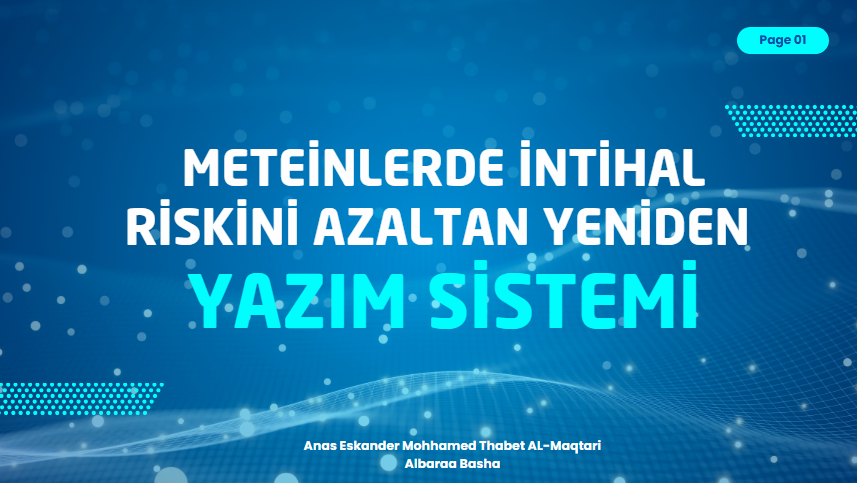

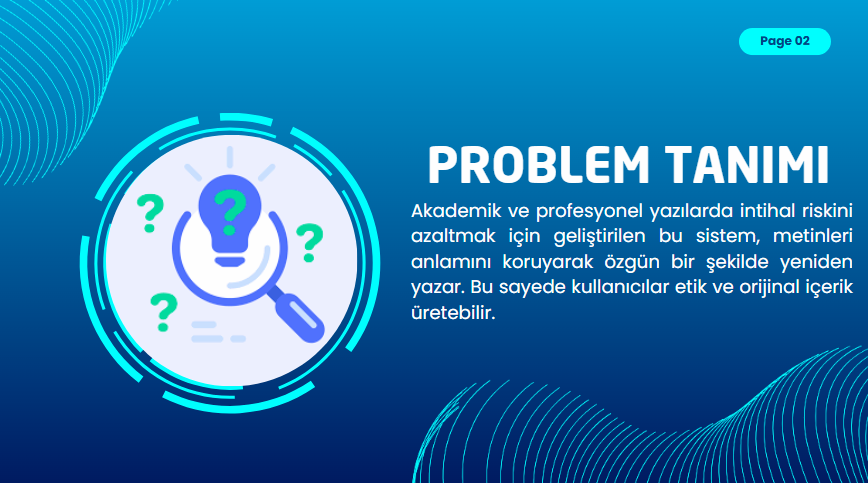

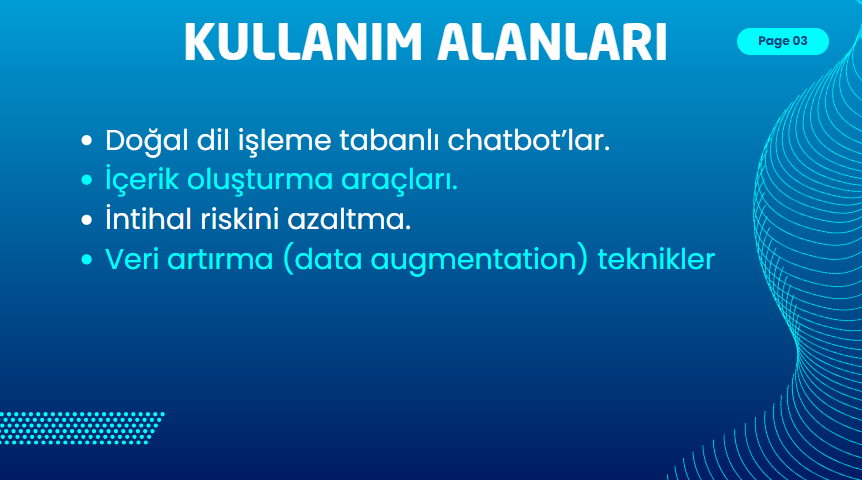

# **T5 Model**

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install --upgrade transformers sympy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [ ]:
import pandas as pd
# from datasets import load_dataset, Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, TrainerCallback
import os
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


## **Data Loading And Preprocessing**

In [ ]:
import pandas as pd
from datasets import load_dataset, Dataset


In [ ]:
train_path = '/content/drive/My Drive/NLP-PROJECT-DATASET/train.tsv'
test_path =  '/content/drive/My Drive/NLP-PROJECT-DATASET/test.tsv'
validation_path = '/content/drive/My Drive/NLP-PROJECT-DATASET/dev.tsv'
train_df = pd.read_csv(train_path, sep='\t', on_bad_lines='skip')
test_df = pd.read_csv(test_path, sep='\t', on_bad_lines='skip')
validation_df = pd.read_csv(validation_path, sep='\t', on_bad_lines='skip')

In [ ]:
train_df

,id,sentence1,sentence2,label
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
...,...,...,...,...
49396,49397,"`` Our school is of spiritual and spiritual , ...",`` Our School is of the Temporal and the Spiri...,0
49397,49398,She was in Cork on June 24 and arrived on 8 Ju...,"She was at Cork on 24 June , and arrived in th...",1
49398,49399,Cornelia Stuyvesant Vanderbilt ( George and Ed...,John John F. A. Cecil ( the only child of Geor...,0
49399,49400,The third season was premiered on 7 June 2010 ...,"The fourth season was premiered on June 7 , 20...",0


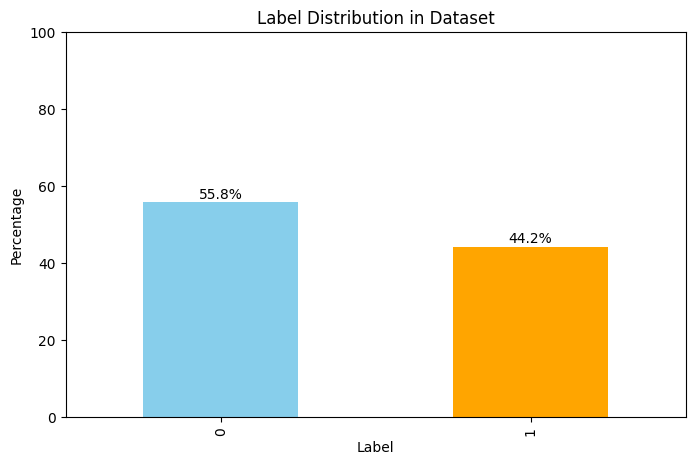

In [ ]:
# veri setindeki etiketlerin dagilimini
import pandas as pd
import matplotlib.pyplot as plt

train_label_counts = train_df['label'].value_counts()
total_train_sentences = len(train_df)
train_label_ratios = (train_label_counts / total_train_sentences) * 100

plt.figure(figsize=(8, 5))
train_label_ratios.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Label Distribution in Dataset')
plt.ylabel('Percentage')
plt.xlabel('Label')
plt.ylim(0, 100)
for i, v in enumerate(train_label_ratios):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()


In [ ]:
def preprocess_dataset(dataset, label=1):
  df = pd.DataFrame(dataset)
  df = df[df['label']==label]

  df['input_text'] =  df['sentence1']
  df['target_text'] = df['sentence2']

  return df[['input_text','target_text']]

train_df = preprocess_dataset(train_df)
test_df = preprocess_dataset(test_df)
validation_df = preprocess_dataset(validation_df)


train_df

,input_text,target_text
1,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...
3,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...
4,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...
5,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ..."
7,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...
...,...,...
49384,"The Romanesque language , Galician ( Galego ) ...",The Romance language currently spoken in Galic...
49390,Note that k is a vector consisting of three in...,It is necessary to note that k is a vector con...
49393,"Tim Henman won in the final 6 -- 2 , 7 -- 6 , ...","Tim Tim Henman won 6 -- 2 , 7 -- 6 against Yev..."
49395,He was considered an active member of the coun...,He was considered an active member of the Coun...


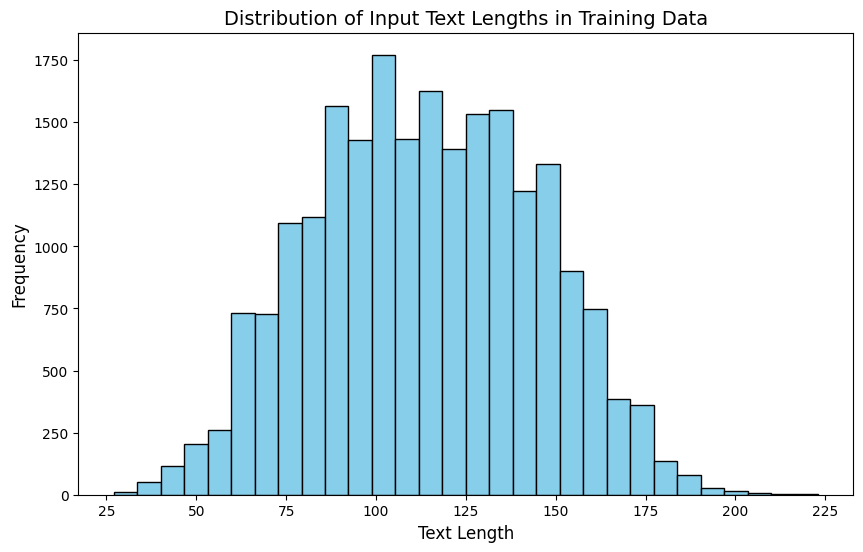

In [ ]:
# egitim verilerindeki giris metni uzunluklarinin dagilimi
train_df['input_length'] = train_df['input_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(train_df['input_length'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Input Text Lengths in Training Data', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
validation_dataset = Dataset.from_pandas(validation_df)

In [ ]:
train_dataset

Dataset({
    features: ['input_text', 'target_text', 'input_length', '__index_level_0__'],
    num_rows: 21829
})

In [ ]:
test_dataset

Dataset({
    features: ['input_text', 'target_text', '__index_level_0__'],
    num_rows: 3536
})

In [ ]:
validation_dataset

Dataset({
    features: ['input_text', 'target_text', '__index_level_0__'],
    num_rows: 3539
})

## **T5 Tokenization**

In [ ]:
max_length = max([len(text) for text in train_dataset['input_text']])
print(max_length)
max_length_tok = max([len(tokenizer.encode(text)) for text in train_dataset['input_text']])
print(max_length_tok)

223
79


### **Initialize tokenizer and model**

In [ ]:
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

### **Tokenization function**

In [ ]:
def tokenize_function(examples):
    inputs = tokenizer(examples['input_text'], max_length=max_length_tok, truncation=True, padding="max_length")
    targets = tokenizer(examples['target_text'], max_length=max_length_tok, truncation=True, padding="max_length")
    inputs['labels'] = targets['input_ids']
    return inputs


train_dataset = train_dataset.map(tokenize_function, batched=True)
validation_dataset = validation_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/21829 [00:00<?, ? examples/s]

Map:   0%|          | 0/3539 [00:00<?, ? examples/s]

In [ ]:
train_dataset[0]


{'input_text': 'The NBA season of 1975 -- 76 was the 30th season of the National Basketball Association .',
 'target_text': 'The 1975 -- 76 season of the National Basketball Association was the 30th season of the NBA .',
 'input_length': 89,
 '__index_level_0__': 1,
 'input_ids': [37,
  14512,
  774,
  13,
  16312,
  1636,
  3,
  3959,
  47,
  8,
  604,
  189,
  774,
  13,
  8,
  868,
  21249,
  2125,
  3,
  5,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

### **T5 Model Fine Tuning**

#### **Set directories in Google Drive**

In [ ]:
drive.mount('/content/drive')
results_dir = "/content/drive/MyDrive/resultsFinal"

os.makedirs(results_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Define training arguments**

In [ ]:
# modeli eğitmek için  eğitim ayarlarını hazırlama.
training_args = TrainingArguments(
    output_dir= results_dir,
    evaluation_strategy="epoch",
    learning_rate=3e-5,  # modelin her adımda ağırlıklarını ne kadar değiştireceğini belirliyor
    per_device_train_batch_size=8,  #aynı anda işlenecek örnek (veri) sayısını
    per_device_eval_batch_size=8,
    num_train_epochs=30,
    weight_decay=0.01,  # ağırlıkların çok büyümesini ve modele aşırı uyum sağlamasını engeller.
    fp16=True  # Eğitimi hızlandırmak ve bellek kullanımını azaltmak için
)



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


#### **Initialize Trainer**


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
)

#### **Start training**

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.049400,0.060990
2,0.052900,0.058261
3,0.047800,0.058044
4,0.044300,0.058454
5,0.042000,0.059184
6,0.039900,0.059875
7,0.035600,0.061396
8,0.035100,0.061527
9,0.032800,0.062769
10,0.029900,0.063391


TrainOutput(global_step=81870, training_loss=0.027795922130080565, metrics={'train_runtime': 22687.9309, 'train_samples_per_second': 28.864, 'train_steps_per_second': 3.609, 'total_flos': 1.736909777253888e+17, 'train_loss': 0.027795922130080565, 'epoch': 30.0})

In [ ]:
# Training Loss düzenli olarak azalırken, Validation Loss 7. epoch’tan sonra artmaya başlıyor ve aşırı uyum belirtileri görülüyor. Ancak, 26. epoch’tan itibaren Validation Loss tekrar azalmaya başlıyor.
# Eğer birkaç epoch daha ekleseydik, aşırı uyum tamamen ortadan kalkabilir ve model daha dengeli bir performans gösterebilirdi Ancak ücretli COLAB'ı kullandığımız için bu eğitimden sonra zamanımız olmadı


#### **Save the final results and model**

In [ ]:
trainer.save_model(results_dir)
tokenizer.save_pretrained(results_dir)

('/content/drive/MyDrive/resultsFinal/tokenizer_config.json',
 '/content/drive/MyDrive/resultsFinal/special_tokens_map.json',
 '/content/drive/MyDrive/resultsFinal/spiece.model',
 '/content/drive/MyDrive/resultsFinal/added_tokens.json')

### **Inference (Paraphrase Generation System)**

#### **Load Model**

In [ ]:
import os
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained(results_dir)
tokenizer = T5Tokenizer.from_pretrained(results_dir)

In [ ]:
# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

#### **Generate paraphrases with corrected num_beams and num_return_sequences**

In [ ]:
def generate_paraphrase(input_text, model, tokenizer, max_length=max_length_tok, num_beams=5, num_return_sequences=4, top_k=100, top_p=0.9, temperature=1.0):

    # Tokenize input
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=max_length, padding="max_length")

    # Move inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}


    outputs = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=max_length + 20,  # Increase max_length for more room in paraphrases
        num_beams=num_beams,
        num_return_sequences=num_return_sequences,
        top_k=top_k,              # Use top-k sampling for diversity
        top_p=top_p,              # Use top-p sampling for nucleus-based sampling
        temperature=temperature,  # Encourage more exploratory generation
        do_sample=True,           # Enable sampling for top-k and top-p
        early_stopping=True
    )

    # Decode generated outputs
    paraphrased_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return paraphrased_texts

#### **Example sentence**

In [ ]:
input_sentence = "The quick brown fox jumps over the lazy dog."
paraphrased_sentences = generate_paraphrase(
    input_sentence, model, tokenizer,max_length, num_return_sequences=4
)
print(f"Original: {input_sentence}")
for i, paraphrase in enumerate(paraphrased_sentences, 1):
    print(f"Paraphrase {i}: {paraphrase}")

Original: The quick brown fox jumps over the lazy dog.
Paraphrase 1: The quick brown fox jumps over the lazy dog.
Paraphrase 2: The quick brown fox jumps over the lazy dog .
Paraphrase 3: The quick brown fox jumps over the lazy dog.
Paraphrase 4: The swift brown fox jumps over the lazy dog.


#### **Example2 sentence**

In [ ]:
input_sentence = "She enjoys reading books on rainy afternoons."
paraphrased_sentences = generate_paraphrase(
    input_sentence, model, tokenizer, num_return_sequences=4
)
print(f"Original: {input_sentence}")
for i, paraphrase in enumerate(paraphrased_sentences, 1):
    print(f"Paraphrase {i}: {paraphrase}")

Original: She enjoys reading books on rainy afternoons.
Paraphrase 1: She enjoys reading books on rainy afternoons .
Paraphrase 2: On rainy afternoons she enjoys reading books .
Paraphrase 3: She enjoys reading books on rainy afternoons.
Paraphrase 4: On rainy afternoons she enjoys reading books.


#### **Example3 sentence**

In [ ]:
input_sentence = "The dog barked loudly at the stranger outside the house."
paraphrased_sentences = generate_paraphrase(
    input_sentence, model, tokenizer, num_return_sequences=4
)
print(f"Original: {input_sentence}")
for i, paraphrase in enumerate(paraphrased_sentences, 1):
    print(f"Paraphrase {i}: {paraphrase}")

Original: The dog barked loudly at the stranger outside the house.
Paraphrase 1: The dog barked loudly at the stranger outside the house .
Paraphrase 2: The dog loudly barked at the stranger outside the house .
Paraphrase 3: The dog barked loudly at the stranger outside the home .
Paraphrase 4: The dog barked loudly at the stranger outside the house.


## **Evaluate model**

In [ ]:
!pip install nltk

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to compute BLEU score for generated paraphrases
def calculate_bleu_score(reference_texts, generated_texts):
    # Use a smoothing function to handle cases where BLEU score might be 0
    smooth_fn = SmoothingFunction().method1
    bleu_scores = []

    for ref, gen in zip(reference_texts, generated_texts):
        # BLEU score is calculated between reference and generated text
        ref_tokens = ref.split()  # Tokenize reference text into words
        gen_tokens = gen.split()  # Tokenize generated text into words
        score = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smooth_fn)
        bleu_scores.append(score)

    return sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0


def evaluate_model(model, tokenizer, test_dataset):
    model.eval()  # Set the model to evaluation mode
    generated_paraphrases = []
    reference_texts = []

    # Generate paraphrases for the test set and collect references
    for example in test_dataset:
        input_text = example['input_text']
        reference_text = example['target_text']

        # Generate paraphrases
        paraphrases = generate_paraphrase(input_text, model, tokenizer)
        generated_paraphrases.append(paraphrases[1])  # Use the seconed generated paraphrase as the prediction
        reference_texts.append(reference_text)

    bleu_score = calculate_bleu_score(reference_texts, generated_paraphrases)
    return bleu_score

bleu_score = evaluate_model(model, tokenizer, test_dataset)
print(f"BLEU score on test dataset: {bleu_score:.4f}")


BLEU score on test dataset: 0.6032


In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=a0c3a1cf6d4cdea07bc29f37224fe5f444fb4aa9efff12e60af079feff7eae40
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

def calculate_rouge_scores(reference_texts, generated_texts):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    for ref, gen in zip(reference_texts, generated_texts):
        rouge_scores = scorer.score(ref, gen)
        for key in scores.keys():
            scores[key].append(rouge_scores[key].fmeasure)

    avg_scores = {key: sum(value) / len(value) for key, value in scores.items()}
    return avg_scores
# Generate paraphrases and prepare reference texts
reference_texts = [example['target_text'] for example in test_dataset]
generated_paraphrases = [
    generate_paraphrase(example['input_text'], model, tokenizer)[0]
    for example in test_dataset
]

rouge_scores = calculate_rouge_scores(reference_texts, generated_paraphrases)
print(f"ROUGE Scores: {rouge_scores}")


ROUGE Scores: {'rouge1': 0.9327038381564654, 'rouge2': 0.7702513270480665, 'rougeL': 0.8531064027196402}


In [ ]:
pip install sacrebleu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 9.4 MB/s eta 0:00:00


In [ ]:
from nltk.translate.meteor_score import meteor_score
from sacrebleu.metrics import TER

reference_texts = [example['target_text'] for example in test_dataset]
generated_texts = [
    generate_paraphrase(example['input_text'], model, tokenizer)[0]
    for example in test_dataset
]

ter = calculate_ter_scores(reference_texts, generated_texts)
print(f"TER Score: {ter}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-1de9d5a19c4e>", line 14, in <cell line: 14>
    generated_texts = [
  File "<ipython-input-18-1de9d5a19c4e>", line 15, in <listcomp>
    generate_paraphrase(example['input_text'], model, tokenizer)[0]
  File "<ipython-input-12-a28638abc568>", line 24, in generate_paraphrase
    paraphrased_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
  File "<ipython-input-12-a28638abc568>", line 24, in <listcomp>
    paraphrased_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
  File "/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py", line 3843, in decode
    return self._decode(
  File "/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils.py", line 1091, in _decod

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Calculate TER
ter = calculate_ter_scores(reference_texts, generated_texts)
print(f"TER Score: {ter}")

TER Score: 0.16391057930792835


In [ ]:
pip install bert-score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
from bert_score import score

def calculate_bertscore(reference_texts, generated_texts, lang="en"):
    P, R, F1 = score(generated_texts, reference_texts, lang=lang)
    avg_f1 = F1.mean().item()
    return avg_f1

# Example usage:
bertscore = calculate_bertscore(reference_texts, generated_texts)
print(f"BERTScore (F1): {bertscore}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore (F1): 0.9750694036483765


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_embedding_similarity(reference_texts, generated_texts):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    ref_embeddings = model.encode(reference_texts, convert_to_tensor=True)
    gen_embeddings = model.encode(generated_texts, convert_to_tensor=True)
    similarities = cosine_similarity(ref_embeddings.cpu().numpy(), gen_embeddings.cpu().numpy())
    avg_similarity = np.mean(np.diagonal(similarities))
    return avg_similarity

# Example usage:
embedding_similarity = calculate_embedding_similarity(reference_texts, generated_texts)
print(f"Embedding Cosine Similarity: {embedding_similarity}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding Cosine Similarity: 0.9683459997177124


In [ ]:
print("BLEU score on test dataset: 0.6032")
print("ROUGE Scores: \n ROUGE-1: 0.9327 \n ROUGE-2: 0.7703 \n ROUGE-L: 0.8531")
print(f"TER Score: {ter:.4f}")
print(f"BERTScore (F1): {bertscore:.4f}")
print(f"Embedding Cosine Similarity: {embedding_similarity:.4f}")

BLEU score on test dataset: 0.6032
ROUGE Scores: 
 ROUGE-1: 0.9327 
 ROUGE-2: 0.7703 
 ROUGE-L: 0.8531
TER Score: 0.1639
BERTScore (F1): 0.9751
Embedding Cosine Similarity: 0.9683


**BLEU Skoru** (0.6032): İyi bir n-gram örtüşmesi olduğunu gösteriyor, ancak BLEU, tam kelime eşleşmelerine duyarlı olduğu için metinlerdeki küçük farklılıklar sonucu skor biraz düşük olabilir.

**ROUGE Skorları:**

*ROUGE-1* (0.9327): Yüksek unigram (tek kelime) örtüşmesi, metinlerin kelimesel benzerliğini gösteriyor.

*ROUGE-2* (0.7703): İyi bir bigram (iki kelime) örtüşmesi sağlanmış.

*ROUGE-L* (0.8531): Uzun ortak alt dizinin (LCS) yüksekliği, metnin genel yapısının iyi uyum sağladığını gösteriyor.

**TER Skoru** (0.1639): Düşük TER skoru, referans metinlere uyum sağlamak için az sayıda düzenleme yapılması gerektiğini gösteriyor, yani modelin çıktısı oldukça doğru.

**BERTScore** (F1: 0.9751): Bağlamsal gömme temelli benzerlik yüksek, metinlerin anlamı açısından çok iyi bir uyum sağlanmış.

**Cosine Similarity** (0.9683): Vektör uzayında mükemmel bir benzerlik var, bu da metinlerin anlam olarak oldukça yakın olduğunu gösteriyor.

#**BART MODELI**

In [ ]:
https://colab.research.google.com/drive/1ahEVK02X5kRjI_TH6nuRYcYnBmsEJi9T#scrollTo=305Btk_xlvBJ

# **Flask Time**